# Diabetes prediction

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

In [437]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [438]:
data = pd.read_csv("diabetes_prediction_dataset.csv")

In [439]:
data = data.sample(20000, random_state=37)

In [440]:
data.reset_index(drop=True, inplace=True)

# Data exploration

gender column

In [441]:
data.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Male,63.0,0,0,current,24.96,6.2,126,0
1,Male,63.0,0,0,current,27.46,4.8,126,0
2,Female,64.0,0,0,never,27.32,6.6,100,0
3,Male,18.0,0,0,never,27.57,4.8,145,0
4,Female,4.0,0,0,No Info,17.33,4.0,130,0
5,Male,44.0,0,0,never,38.78,4.0,126,0
6,Female,33.0,0,0,never,27.32,4.5,200,0
7,Male,80.0,0,1,never,27.32,6.2,126,0
8,Male,76.0,0,0,No Info,29.34,6.6,155,1
9,Female,64.0,0,0,former,24.22,4.0,100,0


In [442]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               20000 non-null  object 
 1   age                  20000 non-null  float64
 2   hypertension         20000 non-null  int64  
 3   heart_disease        20000 non-null  int64  
 4   smoking_history      20000 non-null  object 
 5   bmi                  20000 non-null  float64
 6   HbA1c_level          20000 non-null  float64
 7   blood_glucose_level  20000 non-null  int64  
 8   diabetes             20000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 1.4+ MB


In [443]:
data['gender'].value_counts()

gender
Female    11619
Male       8380
Other         1
Name: count, dtype: int64

In [444]:
data = data[data['gender'] != 'Other']
data['gender'] = data['gender'].replace({'Male': 1, 'Female': 0})

Onde hot Encoder on smoking_history column

In [445]:
from sklearn.preprocessing import OneHotEncoder

# Replace "your_data_file.csv" with your actual data file
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
smoking_history_encoded = encoder.fit_transform(data['smoking_history'].fillna('Unknown').values.reshape(-1, 1))
smoking_history_df = pd.DataFrame(smoking_history_encoded, columns=['No Info', 'current', 'ever', 'former', 'never', 'not current'])

# Assign the index from the original data DataFrame to smoking_history_df
smoking_history_df.index = data.index

# Replace NaN values with 0 in the encoded DataFrame
smoking_history_df = smoking_history_df.fillna(0)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [446]:
data.drop('smoking_history', axis=1, inplace=True)
data = pd.concat([data, smoking_history_df], axis=1)

In [447]:
data.head(10)

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,No Info,current,ever,former,never,not current
0,1,63.0,0,0,24.96,6.2,126,0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,63.0,0,0,27.46,4.8,126,0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,64.0,0,0,27.32,6.6,100,0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,18.0,0,0,27.57,4.8,145,0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,4.0,0,0,17.33,4.0,130,0,1.0,0.0,0.0,0.0,0.0,0.0
5,1,44.0,0,0,38.78,4.0,126,0,0.0,0.0,0.0,0.0,1.0,0.0
6,0,33.0,0,0,27.32,4.5,200,0,0.0,0.0,0.0,0.0,1.0,0.0
7,1,80.0,0,1,27.32,6.2,126,0,0.0,0.0,0.0,0.0,1.0,0.0
8,1,76.0,0,0,29.34,6.6,155,1,1.0,0.0,0.0,0.0,0.0,0.0
9,0,64.0,0,0,24.22,4.0,100,0,0.0,0.0,0.0,1.0,0.0,0.0


Missing values

In [448]:
missing = data.isnull().sum()
missing

gender                 0
age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
No Info                0
current                0
ever                   0
former                 0
never                  0
not current            0
dtype: int64

Utrudnianie sobie życia

In [449]:
#missing_fraction = 0.1
#features = data.drop(["diabetes"], axis=1).columns
#mask = np.random.rand(*data[features].shape) < missing_fraction
#data[features] = data[features].mask(mask)

In [450]:
missing = data.isnull().sum() / data.shape[0]
pd.DataFrame({"missing": missing}).sort_values(by="missing", ascending=False)[:-1]

,missing
gender,0.0
age,0.0
hypertension,0.0
heart_disease,0.0
bmi,0.0
HbA1c_level,0.0
blood_glucose_level,0.0
diabetes,0.0
No Info,0.0
current,0.0


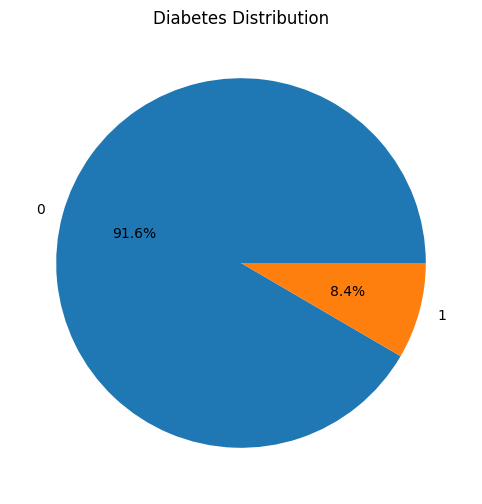

In [451]:
diabetes_counts = data['diabetes'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
diabetes_counts.plot.pie(autopct='%1.1f%%')
plt.title('Diabetes Distribution')
plt.ylabel('')
plt.show()

# Heatmap

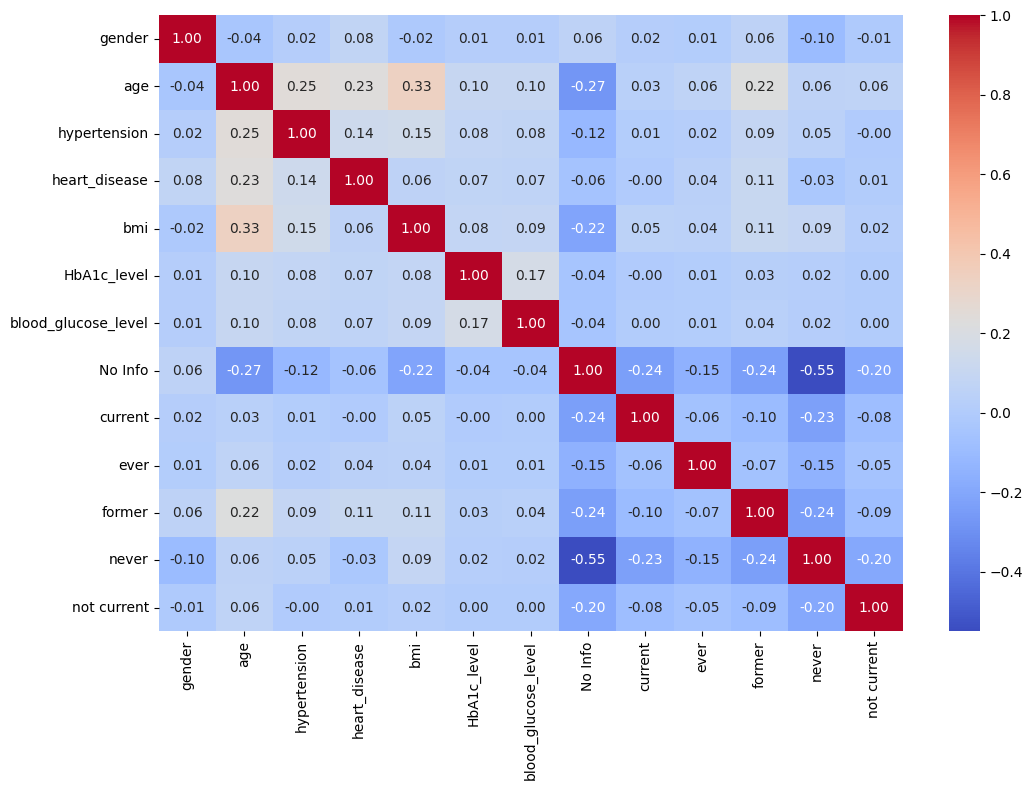

In [452]:
corr = data.drop(["diabetes"], axis=1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

No highly correlated feature, so non to be removed

# Plots

In [453]:
def plot(column, df, target):
    for i in df[target].unique():
        sns.kdeplot(
            data=df[df[target] == i][column],
            label=i,
            warn_singular=False
        )
    plt.legend()

def plot_log(column, df, target):
    for i in df[target].unique():
        sns.kdeplot(
            data=np.log(df[df[target] == i][column]),
            label=i,
            warn_singular=False
        )
    plt.legend()

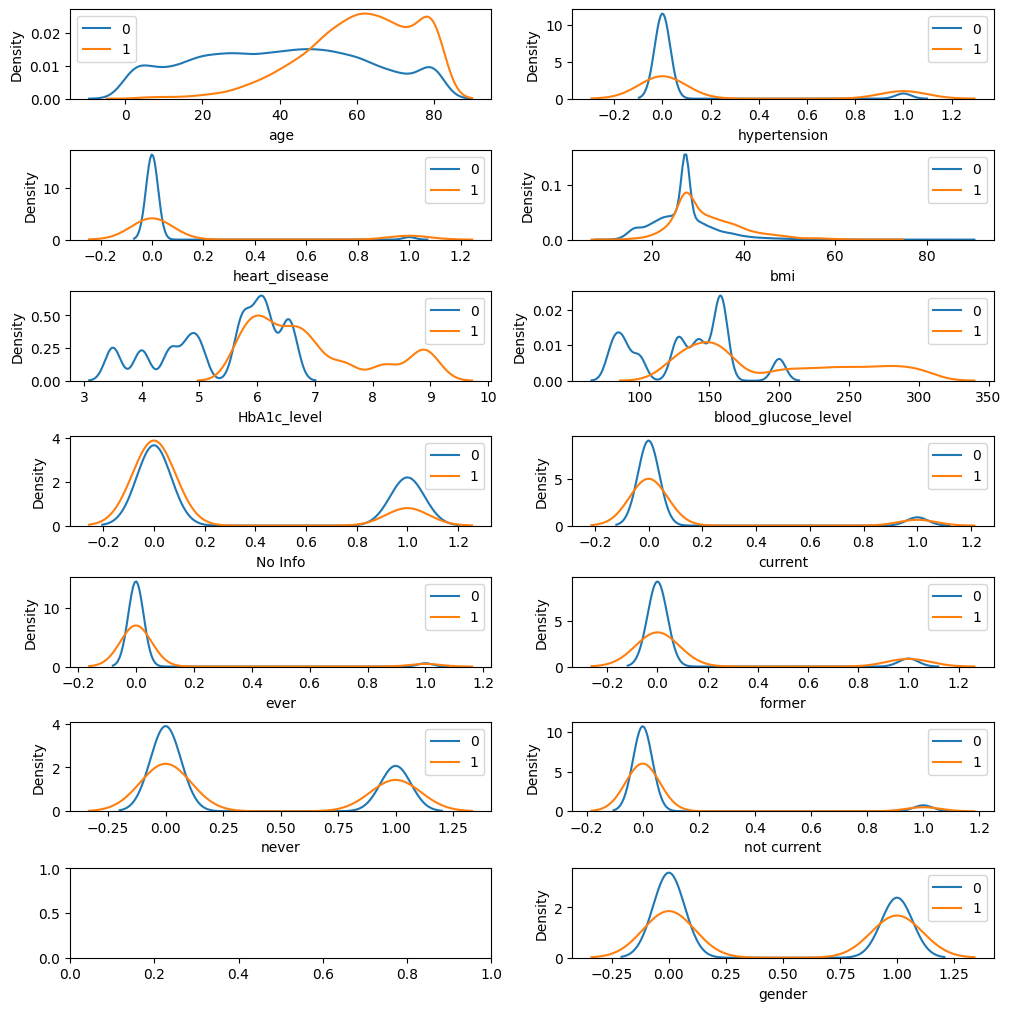

In [454]:
ax, fig = plt.subplots(7, 2, figsize=(10, 10), constrained_layout=True)
for i, column in enumerate(data.drop(['diabetes'], axis=1).columns):
    if column in data: plot(column, data, 'diabetes')
    plt.subplot(7, 2, i + 1)

# Preprocessing

In [455]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, r2_score

In [456]:
target = 'diabetes'
features = data.drop([target], axis=1).columns

preprocessing = ColumnTransformer(
    [
        ("features", Pipeline([
            ("imputer", KNNImputer()),
            ("scaler", StandardScaler())
        ]), features)
    ]
)

In [457]:
label_encoder = LabelEncoder()
data[target] = label_encoder.fit_transform(data[target])
X, Y = RandomUnderSampler().fit_resample(data.drop([target], axis=1), data[target])

In [458]:
def get_pipeline(model):
    return Pipeline([
        ("preprocessing", preprocessing),
        ("model", model)
    ])

def save_metrics(model_name, y_pred, y_test):
    r2 = r2_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=1, output_dict=True)
    macro_avg = report["macro avg"]
    models[model_name] = {
        "r2": r2,
        "accuracy": report["accuracy"],
        "precision": macro_avg["precision"],
        "recall": macro_avg["recall"],
        "f1-score": macro_avg["f1-score"]
    }

In [459]:
# model metrics container
models = {}

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=37, stratify=Y)

# 5-fold cross validation
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=37)

In [460]:
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [461]:
models_iterator = [
    {
        'name': 'Logistic Regression',
        'model': LogisticRegression(multi_class='multinomial'),
        'grid': {
            'model__C': [0.01, 0.1, 1, 10, 100]
        }
    },
    {
        'name': 'Random Forest',
        'model': RandomForestClassifier(),
        'grid': {
            'model__n_estimators': [100, 300, 500],
            'model__max_depth': [5, 10]
        }
    },
    {
        'name': 'KNN',
        'model': KNeighborsClassifier(),
        'grid': {
            'model__n_neighbors': [3, 5, 7, 9]
        }
    },
    {
        'name': 'SVM',
        'model': SVC(),
        'grid': {
            'model__C': [0.01, 0.1, 1, 10, 100],
            'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
        }
    },
    {
        'name': 'XGBoost',
        'model': XGBClassifier(),
        'grid': {
            'model__n_estimators': [100, 300],
            'model__max_depth': [5, 10],
            'model__learning_rate': [0.01, 0.1, 1]
        }
    }
]

for model_info in models_iterator:
    model_name = model_info['name']
    model = model_info['model']
    grid = model_info['grid']

    pipeline = get_pipeline(model)
    cv = GridSearchCV(pipeline, grid, cv=k_fold, n_jobs=-1)
    cv.fit(X_train, y_train)
    y_pred = cv.predict(X_test)

    save_metrics(model_name, y_pred, y_test)
    #print(model_name, "Best Parameters:", cv.best_params_)
    #print(model_name, "Classification Report:")
    #print(classification_report(y_test, y_pred, zero_division=1))


In [462]:
df = pd.DataFrame(models).T
df = df[["accuracy", "r2", "precision", "recall", "f1-score"]]
df

,accuracy,r2,precision,recall,f1-score
Logistic Regression,0.875186,0.500742,0.875389,0.875203,0.875172
Random Forest,0.913819,0.655274,0.913836,0.913814,0.913817
KNN,0.826152,0.304605,0.826297,0.826136,0.826127
SVM,0.872214,0.488855,0.872326,0.872227,0.872207
XGBoost,0.897474,0.589895,0.897479,0.897472,0.897473


# Convolutional Neural Network

In [463]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
label_encoder = LabelEncoder()
data["diabetes"] = label_encoder.fit_transform(data["diabetes"])
X, Y = RandomUnderSampler().fit_resample(data.drop(["diabetes"], axis=1), data["diabetes"])
print(X)

      gender   age  hypertension  heart_disease    bmi  HbA1c_level  \
0          0  66.0             0              0  28.06          6.5   
1          1  40.0             0              0  27.94          4.8   
2          0  28.0             0              0  31.57          6.0   
3          1  44.0             0              0  27.32          4.0   
4          0   6.0             0              0  15.95          6.0   
...      ...   ...           ...            ...    ...          ...   
3359       0  50.0             1              0  27.32          7.0   
3360       0  61.0             1              0  27.32          8.8   
3361       0  49.0             1              0  35.00          6.0   
3362       1  58.0             0              1  33.35          8.8   
3363       0  57.0             0              0  37.62          8.8   

      blood_glucose_level  No Info  current  ever  former  never  not current  
0                     155      0.0      0.0   0.0     0.0    0.0   

In [464]:
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=69)

In [465]:
import tensorflow.keras.layers as tfl
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

In [466]:
def get_cnn(input_shape, num_classes):
    model = Sequential([
        tfl.Reshape((input_shape[0], 1), input_shape=input_shape),
        tfl.Conv1D(filters=32, kernel_size=3, activation='relu'),
        tfl.BatchNormalization(),
        tfl.Dropout(0.2),
        tfl.Conv1D(filters=64, kernel_size=3, activation='relu'),
        tfl.MaxPooling1D(pool_size=2),
        tfl.Flatten(),
        tfl.Dense(128, activation='relu'),
        tfl.BatchNormalization(),
        tfl.Dropout(0.5),
        tfl.Dense(64, activation='relu'),
        tfl.BatchNormalization(),
        tfl.Dropout(0.3),
        tfl.Dense(32, activation='relu'),
        tfl.BatchNormalization(),
        tfl.Dropout(0.1),
        tfl.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [467]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=25,
    restore_best_weights=True
)

X_train_preprocessed = X_train
X_test_preprocessed = X_test
X_train, X_val, y_train, y_val = train_test_split(X_train_preprocessed, y_train, test_size=0.2, random_state=69)

In [468]:
# one-hot encoding
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [469]:
cnn_model = get_cnn(X_train.shape[1:], 2)
cnn_model.summary()

cnn_history = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    callbacks=[early_stopping],
    verbose=0
)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_8 (Reshape)         (None, 13, 1)             0         
                                                                 
 conv1d_16 (Conv1D)          (None, 11, 32)            128       
                                                                 
 batch_normalization_32 (Bat  (None, 11, 32)           128       
 chNormalization)                                                
                                                                 
 dropout_32 (Dropout)        (None, 11, 32)            0         
                                                                 
 conv1d_17 (Conv1D)          (None, 9, 64)             6208      
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 4, 64)            0         
 1D)                                                  

22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       336
           1       0.88      0.85      0.87       337

    accuracy                           0.87       673
   macro avg       0.87      0.87      0.87       673
weighted avg       0.87      0.87      0.87       673



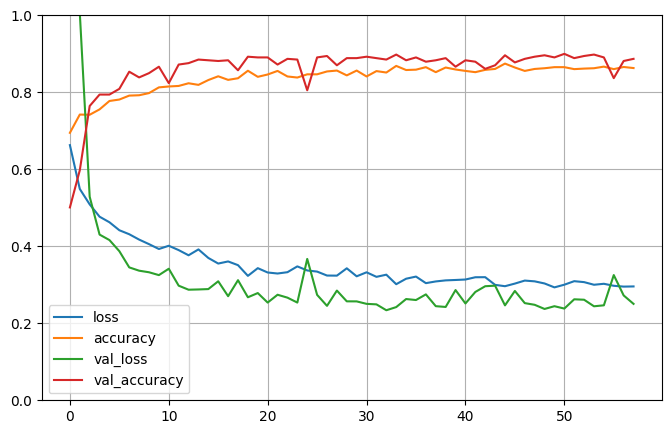

In [470]:
y_pred = cnn_model.predict(X_test_preprocessed)
y_pred = np.argmax(y_pred, axis=1)

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def save_metrics(model_name, y_pred, y_test):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    metrics = {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    # Save metrics to a file, database, or print them
    # Replace this with your desired method of saving the metrics
    save_to_file(metrics)


def save_to_file(metrics):
    # Replace this with your desired method of saving the metrics to a file
    with open('metrics.txt', 'w') as file:
        for key, value in metrics.items():
            file.write(f'{key}: {value}\n')
print(classification_report(y_test, y_pred, zero_division=1))
save_metrics("CNN", y_pred, y_test)
pd.DataFrame(cnn_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       336
           1       0.88      0.85      0.87       337

    accuracy                           0.87       673
   macro avg       0.87      0.87      0.87       673
weighted avg       0.87      0.87      0.87       673



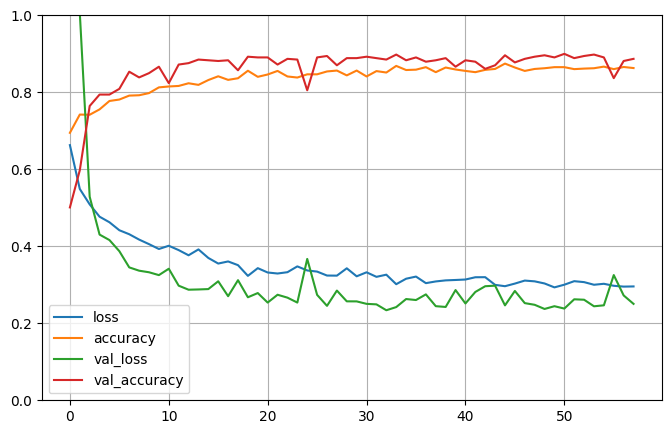

In [471]:
y_pred = cnn_model.predict(X_test_preprocessed)
y_pred = np.argmax(y_pred, axis=1)

save_metrics("CNN", y_pred, y_test)
print(classification_report(y_test, y_pred, zero_division=1))

pd.DataFrame(cnn_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [434]:
df = pd.DataFrame(models).T
df = df[["accuracy", "r2", "precision", "recall", "f1-score"]]
df

,accuracy,r2,precision,recall,f1-score
Logistic Regression,0.875186,0.500742,0.875234,0.875194,0.875183
Random Forest,0.904903,0.619613,0.905040,0.904890,0.904893
KNN,0.842496,0.369984,0.842541,0.842505,0.842493
SVM,0.872214,0.488855,0.872262,0.872223,0.872211
XGBoost,0.894502,0.578008,0.894596,0.894491,0.894494
